In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from random import shuffle

dataset = load_boston()
shuffle(dataset.data)
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
502,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70
503,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
504,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
505,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52


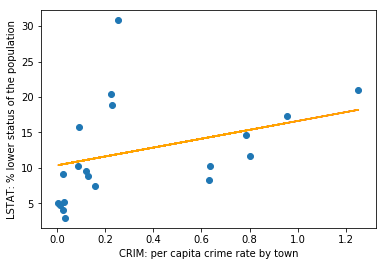

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df['CRIM'].values[:100], df['LSTAT'].values[:100], test_size=.2)

plt.scatter(X_test, y_test)
plt.xlabel('CRIM: per capita crime rate by town')
plt.ylabel('LSTAT: % lower status of the population')


# Linear regression from sklearn as a test
from sklearn.linear_model import LinearRegression
plt.plot(X_test, LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1)).predict(X_test.reshape(-1, 1)).reshape(1, -1)[0], color='r')


slope = ( X_train.shape[0]*(X_train*y_train).sum() - X_train.sum()*y_train.sum() )/\
        ( X_train.shape[0]*(X_train**2).sum() - X_train.sum()**2 )

bias = (y_train.sum()*(X_train**2).sum() - X_train.sum()*(X_train * y_train).sum() )/\
       ( X_train.shape[0]*(X_train**2).sum() - X_train.sum()**2 )

plt.plot(X_test, slope*X_test + bias, color='orange')
plt.show()